# Pandas 101 review

This is a severely cut-down version of the material covered in the Pandas 101 workshop just for a quick reference.

In [1]:
import pandas as pd

## Load DataFrame from CSV

In [2]:
df = pd.read_csv('data/simple_dataframe.csv')

## Display/Select DataFrame elements

For a more complete coverage of these topics look at [the DataFrameAccess notebook](DataFrameAccess.ipynb)

### Head/Tail

In [3]:
df.head(3)

,letters,hundreds,tens,boolean,spelled_out
0,A,100,10.0,True,One
1,B,200,20.0,False,Two
2,c,300,30.0,True,Three


In [4]:
df.tail(2)

,letters,hundreds,tens,boolean,spelled_out
3,D,400,40.0,True,Four
4,eee,500,50.0,False,Five


### Index (row names)

In [5]:
df.index

RangeIndex(start=0, stop=5, step=1)

### Column names

In [6]:
df.columns

Index(['letters', 'hundreds', 'tens', 'boolean', 'spelled_out'], dtype='object')

---

## Selecting/displaying rows, columns, and single values

### `df[]` with a name

A single column or row is not a DataFrame, it's a Series (the Pandas 1D data structure)

In [7]:
df['hundreds']

0    100
1    200
2    300
3    400
4    500
Name: hundreds, dtype: int64

#### List of column names for multiple columns

In [8]:
df[['tens','hundreds']]

,tens,hundreds
0,10.0,100
1,20.0,200
2,30.0,300
3,40.0,400
4,50.0,500


### Boolean Series

**It's very common to want all the rows from your DataFrame which pass a certain test**, or set of criteria. You can write the test itself in a very straightforward way, returning a `Series` of True/False boolean values.

In [9]:
df['tens'] < 35

0     True
1     True
2     True
3    False
4    False
Name: tens, dtype: bool

### `df[]` with boolean Series returns multiple rows, all columns

- Rows are returned where boolean Series == True
- *This may be confusing!* If we use a single bracket with a boolean Series inside, we get back rows instead of columns!
- Note that you can easily use the `df.loc[,:]` notation below to do the same thing, which is somewhat more clear and readable.

In [10]:
df[df['tens'] < 35]

,letters,hundreds,tens,boolean,spelled_out
0,A,100,10.0,True,One
1,B,200,20.0,False,Two
2,c,300,30.0,True,Three


### Row Index doesn't have to be integers!

The Index values aren't "row numbers" – they are instead the names of the rows, so you can use things like strings or dates for the Index.

In [11]:
df2 = df.set_index('spelled_out')
df2

,letters,hundreds,tens,boolean
spelled_out,,,,
One,A,100,10.0,True
Two,B,200,20.0,False
Three,c,300,30.0,True
Four,D,400,40.0,True
Five,eee,500,50.0,False


#### Both the DataFrame and any column Series have the same Index

In [12]:
df2['hundreds']

spelled_out
One      100
Two      200
Three    300
Four     400
Five     500
Name: hundreds, dtype: int64

### `df.loc[row,col]` for label-based, multi-axis indexing

**This is the best access/selection method!** It lets you select first along rows, and then along columns, in both directions simultaneoulsy using row and column "labels", which are the row index and column names.

In [13]:
df2.loc['Three','hundreds']

300

### Colon `:` for selecting whole or slices

In [14]:
df2.loc[:,'hundreds']

spelled_out
One      100
Two      200
Three    300
Four     400
Five     500
Name: hundreds, dtype: int64

#### Slice end-points are included in Pandas selections

Unlike Python lists, in Pandas the slice includes both end points!


In [15]:
df2.loc['Three','letters':'tens']

letters        c
hundreds     300
tens        30.0
Name: Three, dtype: object

### `df.query()` for selecting rows like in SQL "where" statement

The idea is to return rows where column content meets certain criteria, like when you use a boolean series inside of a `df[]` statement.

In [16]:
df2.query('tens < 35')

,letters,hundreds,tens,boolean
spelled_out,,,,
One,A,100,10.0,True
Two,B,200,20.0,False
Three,c,300,30.0,True


### Create an explicit `.copy()` to avoid the SettingWithCopyWarning

If you are assigning a subset of a DataFrame to a new variable with the intention of creating a copy that you'll work on independently of the original, create an explicit copy by chaining the `.copy()` method to the end! *(Try deleting the `.copy()` part of the first command to see what happens without it.)*

In [17]:
df_nums = df2[['hundreds','tens']].copy()
df_nums['sums'] = df_nums['hundreds'] + df_nums['tens']
df_nums

,hundreds,tens,sums
spelled_out,,,
One,100,10.0,110.0
Two,200,20.0,220.0
Three,300,30.0,330.0
Four,400,40.0,440.0
Five,500,50.0,550.0


### Sorting a DataFrame

In [19]:
df_nums.sort_values(by='tens', ascending=False)

,hundreds,tens,sums
spelled_out,,,
Five,500,50.0,550.0
Four,400,40.0,440.0
Three,300,30.0,330.0
Two,200,20.0,220.0
One,100,10.0,110.0


---

## Pandas Plotting

- Pandas wants data in a "wide" format, like Excel, not a "tidy" format like Seaborn or Altair
- For a more complete coverage look at [the BasicPandasPlotting notebook](BasicPandasPlotting.ipynb).

#### Plotting from a DataFrame

By default the plot will use the Index as the x-axis

<AxesSubplot:xlabel='spelled_out'>

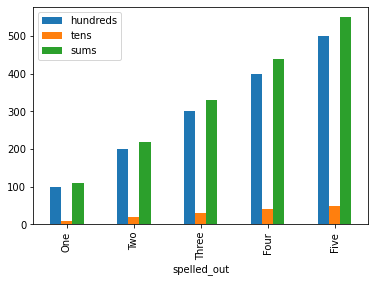

In [40]:
df_nums.plot.bar()

#### Lots of options

- You can explicitly set which columns are used for the x and y values
- There are lots of extra options for controlling the size and layout

array([[<AxesSubplot:xlabel='hundreds'>, <AxesSubplot:xlabel='hundreds'>]],
      dtype=object)

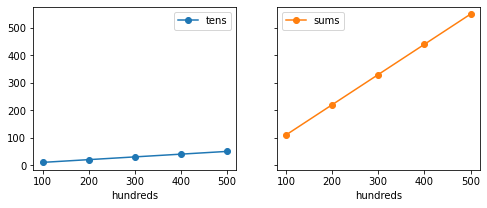

In [42]:
df_nums.plot.line(x='hundreds', 
                  y=['tens','sums'], 
                  subplots=True, 
                  layout=(1,-1), 
                  figsize=(8,3), 
                  sharey=True,
                  marker='o')

#### You can also plot a Series

<AxesSubplot:ylabel='spelled_out'>

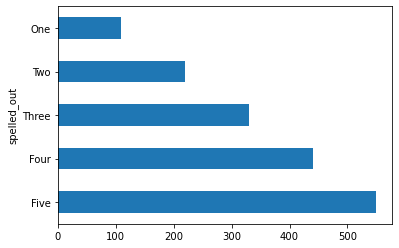

In [29]:
df_nums['sums'].sort_values(ascending=False).plot.barh()